# 나이브 베이즈 분류 모형

나이브베이지안에서 

나이브 베이즈 분류 모형(Naive Bayes classification model)은 대표적인 생성 모형이다. 

타겟 변수 $y$의 각 클래스 $\{C_1,\cdots,C_K\}$ 에 대한 독립 변수 $x$의 조건부 확률 분포 정보 $p(x \mid y = C_k)$ 를 사용하여 주어진 새로운 독립 변수 값 $x_{\text{new}}$에 대한 타켓 변수의 각 클래스의 조건부 확률 $p(y = C_k \mid x_{\text{new}})$ 를 추정한 후 가장 조건부 확률이 큰 클래스 $k$를 선택하는 방법이다.



## 조건부 확률의 계산

다음과 같이 베이즈 규칙을 사용하여 조건부 확률 $p(y = C_k \mid x_{\text{new}})$ 을 계산한다.

$$
P(y = C_k \mid x_{\text{new}}) = \dfrac{P(x_{\text{new}} \mid y = C_k)\; P(y = C_k)}{P(x_{\text{new}})}
$$

최종적으로는 각 클래스 $k$에 대한 확률을 비교하여 최고값을 계산하기만 하면 되므로 분모에 있는 주변 확률(marginal probability) ${P(x_{\text{new}})}$은 계산하지 않는다.

$$
P(y = C_k \mid x_{\text{new}}) \;\; \propto \;\; P(x_{\text{new}} \mid y = C_k) \; P(y = C_k)
$$


여기에서 사전 확률(prior) $P(y = C_k)$는 다음과 같이 쉽게 구할 수 있다.

$$
P(y = C_k) \approx \frac{\text{number of samples with }y = C_k}{\text{number of all samples}}
$$

$y$에 대한 $x$의 조건부 확률인 likelihood는 일반적으로 정규 분포나 베르누이 분포와 같은 특정한 모형을 가정하여 다음과 같이 계산한다.

1. $P(x \mid y = C_k)$ 가 특정한 확률 분포 모형을 따른다고 가정한다.
2. 트레이닝 데이터 $\{x_1, \cdots, x_N\}$을 사용하여 이 모형의 모수(parameter)를 구한다.
3. 모수를 알고 있으므로 새로운 독립 변수 값 $x_{\text{new}}$이 어떤 값이 되더라도 $P(x_{\text{new}} \mid y = C_k)$ 를 계산할 수 있다.

## likelihood 모형

likelihood의 모형으로 많이 사용하는 것은 다음과 같다.=> 종류가 3가지, 베르누이분포, 다항분포, 가우시안 정규 분포가 있다. 

* 베르누이 분포
  * $x$가 0 또는 1 값만을 가질 수 있다.
  * $x$가 1 이 될 확률은 고정되어 있다.
  * 예: 동전을 던진 결과로 어느 동전을 던졌는지를 찾아내는 모형
  
$$ P(x_i \mid y = C_k) = \theta_k^x (1-\theta_k)^{(1-x_i)} $$


* 다항 분포 
  * $(x_1, \ldots, x_n)$ 이 0 또는 양의 정수
  * 예: 주사위를 던진 결과로 어느 주사위를 던졌는지를 찾아내는 모형

$$ P(x_1, \ldots, x_n \mid y = C_k) = \prod_i \theta_k^{x_i}$$


* 가우시안 정규 분포 (다변수아님)
  * $x$가 실수로 특정한 값 근처
  * 예: 시험 점수로 학생이 누구인지를 찾아내는 모형
  
  $$ P(x_i \mid y = C_k) = \dfrac{1}{\sqrt{2\pi\sigma_k^2}} \exp \left(-\dfrac{(x_i-\mu_k)^2}{2\sigma_k^2}\right) $$
  

## 나이브 가정

독립 변수 $x$가 다차원(multi-dimensional) $x = (x_1, \ldots, x_n)$ 이면 위에서 사용한 likelihood $P(x \mid y = C_k)$  는 원래 모든 $x_i$에 대한 결합 확률(joint probability) $P(x_1, \ldots, x_n \mid y = C_k)$ 을 사용해야 한다. 그러나 이러한 결합 확률은 실제로 입수하기 어렵기 때문에 모든 차원의 개별 독립 변수 요소들이 서로 독립(independent)이라는 가정을 흔히 사용한다. 이러한 가정을 나이브 가정(Naive assumption)이라고 한다.

나이브 가정하에서는 결합 확률이 개별 확률의 곱으로 나타난다.

$$
P(x_1, \ldots, x_n \mid y = C_k) = \prod_{i=1}^n P(x_i \mid y = C_k)
$$



$$
P(y = C_k \mid x_{\text{new}}) \;\; \propto \;\; \prod_{i=1}^n P(x_{\text{new},i} \mid y = C_k)\; P(y = C_k)
$$


## Scikit-Learn에서 제공하는 나이브 베이즈 모형

Scikit-Learn의 naive_bayes 서브패키지에서는 다음과 같은 세가지 나이브 베이즈 모형 클래스를 제공한다.

* [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html): 베르누이 분포 나이브 베이즈
* [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html): 다항 분포 나이브 베이즈
* [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html):	가우시안 정규 분포 나이브 베이즈

이 클래스들은 다음과 같은 속성값 및 메서드를 가진다.

## 사전확률과 관련된 속성

* `classes_`: 공통

 * 타겟 Y의 클래스(라벨)


* `class_count_`: 공통

 * 타겟 Y의 값이 특정한 클래스인 표본 데이터의 수, 사전확률을 구하여 x값을 예측하기 위해: 즉, 몇개가 나왔는지를 봐서 확률로 변환해서 그확률이 나오는 x 추정하기 위해 


* `feature_count_`: 베르누이 분포나 다항 분포 

 * 타겟 Y의 값이 특정한 클래스이면서 독립 변수 X의 값이 1인 표본 데이터의 수 (베르누이 분포).
 * 타겟 Y의 값이 특정한 클래스인 독립 변수 X의 값의 합 (다항 분포). 독립 변수 값이 1또는 0만 가지는 경우에는 표본 데이터의 수가 된다. 
 

* `class_prior_`: 가우시안 정규 분포

 * 타겟 Y의 무조건부 확률 분포 $ P(Y) $
 

* `class_log_prior_`: 베르누이 분포나 다항 분포 ## 0과 1사이의 값을 가지므로 log를 해주므로써 0과1사이의 구간을 펴준다 (자세히보여줌) 

 * 타겟 Y의 무조건부 확률 분포의 로그 $ \log P(Y) $
 
 
## Likelihood 추정속성

* `theta_ `, `sigma_` : 가우시안 정규 분포

 * 가우시안 정규 분포의 기댓값 $\mu$ 과 분산 $\sigma^2$
 

* `feature_log_prob_ `: 베르누이 분포나 다항 분포 

 * 베르누이 분포 혹은 다항 분포의 모수 벡터의 로그
 $$ \log \theta = (\log \theta_1, \ldots, \log \theta_n) = \left( \log \dfrac{N_i}{N}, \ldots, \log \dfrac{N_n}{N} \right)$$
 
 * 스무딩(smoothing) 가짜의 데이터를 집어넣음 (2번중에 한번씩 더 꼭 이기게 해주는 보너스게임)
 $$ \hat{\theta} = \frac{ N_{i} + \alpha}{N + \alpha n} $$ 
 
* `predict_proba(x_new)` : 공통

 * 조건부 확률 분포 $ P(Y \mid X_{\text{new}}) $

## 가우시안 정규 분포 나이브 베이즈 모형

In [15]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [16]:
np.random.seed(0)
X0 = sp.stats.norm(-2, 1).rvs(40)
X1 = sp.stats.norm(+2, 1).rvs(60)
X = np.hstack([X0, X1])[:, np.newaxis]
y0 = np.zeros(40)
y1 = np.ones(60)
y = np.hstack([y0, y1]) ## 0클래스, 1 클래스로 나뉨 

In [17]:
X1

array([ 0.95144703,  0.57998206,  0.29372981,  3.9507754 ,  1.49034782,
        1.5619257 ,  0.74720464,  2.77749036,  0.38610215,  1.78725972,
        1.10453344,  2.3869025 ,  1.48919486,  0.81936782,  1.97181777,
        2.42833187,  2.06651722,  2.3024719 ,  1.36567791,  1.63725883,
        1.32753955,  1.64044684,  1.18685372,  0.2737174 ,  2.17742614,
        1.59821906,  0.36980165,  2.46278226,  1.09270164,  2.0519454 ,
        2.72909056,  2.12898291,  3.13940068,  0.76517418,  2.40234164,
        1.31518991,  1.12920285,  1.42115034,  1.68844747,  2.05616534,
        0.83485016,  2.90082649,  2.46566244,  0.46375631,  3.48825219,
        3.89588918,  3.17877957,  1.82007516,  0.92924738,  3.05445173,
        1.59682305,  3.22244507,  2.20827498,  2.97663904,  2.3563664 ,
        2.70657317,  2.01050002,  3.78587049,  2.12691209,  2.40198936])

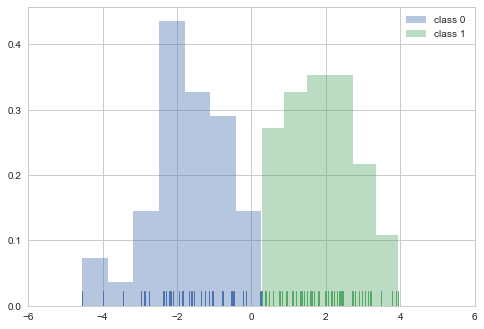

In [18]:
sns.distplot(X0, rug=True, kde=False, norm_hist=True, label="class 0")
sns.distplot(X1, rug=True, kde=False, norm_hist=True, label="class 1")
plt.legend()
plt.xlim(-6,6)
plt.show()

In [19]:
from sklearn.naive_bayes import GaussianNB
clf_norm = GaussianNB().fit(X, y)

In [20]:
clf_norm.classes_ ## 클래스 0,1 로 나뉨 

array([ 0.,  1.])

In [21]:
clf_norm.class_count_## 0일때 개수 , 1일때 개수

array([ 40.,  60.])

In [22]:
clf_norm.class_prior_## 사전확률:0클래스가 나올확률 0.4 

array([ 0.4,  0.6])

In [23]:
clf_norm.theta_, clf_norm.sigma_## 가우시안 정규 분포의 기댓값 mu과 분산 sigma

(array([[-1.68745753],
        [ 1.89131838]]), array([[ 1.13280656],
        [ 0.8668681 ]]))

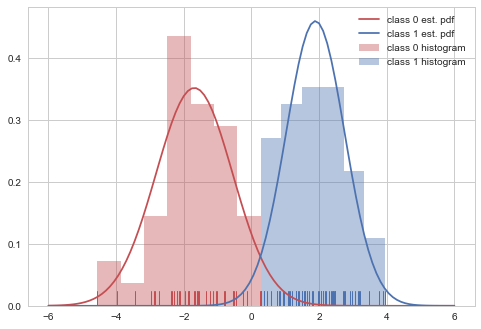

In [24]:
xx = np.linspace(-6, 6, 100)
p0 = sp.stats.norm(clf_norm.theta_[0], clf_norm.sigma_[0]).pdf(xx)
p1 = sp.stats.norm(clf_norm.theta_[1], clf_norm.sigma_[1]).pdf(xx)                                                               
sns.distplot(X0, rug=True, kde=False, norm_hist=True, color="r", label="class 0 histogram")
sns.distplot(X1, rug=True, kde=False, norm_hist=True, color="b", label="class 1 histogram")
plt.plot(xx, p0, c="r", label="class 0 est. pdf")
plt.plot(xx, p1, c="b", label="class 1 est. pdf")
plt.legend()
plt.show()

In [25]:
x_new = -1
clf_norm.predict_proba([[x_new]]) ##  x= -1 일경우 클래스가 0일확률, 클래스가 1일 확률 

array([[ 0.98327446,  0.01672554]])

In [26]:
px = sp.stats.norm(clf_norm.theta_, np.sqrt(clf_norm.sigma_)).pdf(x_new)
px ## likelihood

array([[ 0.30425666],
       [ 0.00345028]])

In [27]:
p = px.flatten() * clf_norm.class_prior_
p

array([ 0.12170266,  0.00207017])

In [28]:
clf_norm.class_prior_

array([ 0.4,  0.6])

In [29]:
p / p.sum() ## 노멀라이징 = predict.prob_와 같다 

array([ 0.98327446,  0.01672554])

## 베르누이 분포 나이브 베이즈 모형

베르누이 나이브 베이즈 모형에서는 타겟 변수뿐 아니라 독립 변수도 0 또는 1의 값을 가져야 한다. 예를 들어 전자우편과 같은 문서 내에 특정한 단어가 포함되어 있는지의 여부는 베르누이 확률 변수로 모형화할 수 있으므로 스팸 필터링에 사용할 수 있다.

In [30]:
np.random.seed(0)
X = np.random.randint(2, size=(10, 4))
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y) ## 예시: 문서 내용이 스팸 단어가 들어가있음 0인경우 특정단어 없음, 1인경우 있음
## 처음 1번 데이터는 2번단어와 3번단어가 나왔음 
## y는 스팸인지 아닌지를 나타냄 

[[0 1 1 0]
 [1 1 1 1]
 [1 1 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 1 0]
 [1 0 1 1]
 [0 1 1 0]]
[0 0 0 0 1 1 1 1 1 1]


In [31]:
from sklearn.naive_bayes import BernoulliNB
clf_bern = BernoulliNB().fit(X, y)

In [32]:
clf_bern.classes_## 베르누이 클래스 분류 

array([0, 1])

In [33]:
clf_bern.class_count_

array([ 4.,  6.])

In [34]:
np.exp(clf_bern.class_log_prior_) ## 스팸일 사전확률 

array([ 0.4,  0.6])

In [35]:
fc = clf_bern.feature_count_ 
## 첫번째 데이터: 스팸메일중에 1,2,3,4번단어나온횟수 
## 두번째 데이터: 정상메일 중에 1,2,3,4번단어나온횟수
fc
## 모수 세타값과 사전확률 손으로 구하기 시험 나옴 

array([[ 2.,  4.,  3.,  1.],
       [ 2.,  3.,  5.,  3.]])

In [36]:
fc / np.repeat(clf_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[ 0.5       ,  1.        ,  0.75      ,  0.25      ],
       [ 0.33333333,  0.5       ,  0.83333333,  0.5       ]])

In [67]:
theta = np.exp(clf_bern.feature_log_prob_) ## 모수: 사전확률 구하기
theta
## feature_log_prob(smoothing): 가짜의 데이터를 집어넣음 (2번중에 한번씩 더 꼭 이기게 주는 보너스게임)
## 효과: 극단적으로 조금몰아줌 0.3 인경우 0.29999 로 해서 데이터를 분활 

array([[ 0.5       ,  0.83333333,  0.66666667,  0.33333333],
       [ 0.375     ,  0.5       ,  0.75      ,  0.5       ]])

In [38]:
x_new = np.array([1, 1, 0, 0])

In [39]:
clf_bern.predict_proba([x_new]) ## 합치면 1 
## 클라스 0일 확률(스팸메일) Vs. 클라스 1일 확률 (정상메일)

array([[ 0.72480181,  0.27519819]])

In [40]:
p = ((theta**x_new)*(1-theta)**(1-x_new)).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.72480181,  0.27519819])

In [76]:
p = ((theta**x_new)*(1-theta)**(1-x_new)).prod(axis=1)
p


array([  1.80844907e+05,   1.39471376e+01])

In [41]:
x_new = np.array([0, 0, 1, 1])

In [42]:
clf_bern.predict_proba([x_new]) ##y = 0일확률, y=1이 나올확률 

array([[ 0.09530901,  0.90469099]])

In [43]:
p = ((theta**x_new)*(1-theta)**(1-x_new)).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.09530901,  0.90469099])

In [65]:
pd.DataFrame(p)

,0
0,2.130471e-27
1,3.353528e-27


## 다항 분포 나이브 베이즈 모형

In [45]:
np.random.seed(0)
X0 = np.random.multinomial(10, [0.3, 0.5, 0.1, 0.1], size=4) ## 샘플한번에 10개횟수로 던짐, 총 4세트 
X1 = np.random.multinomial(8, [0.1, 0.1, 0.35, 0.45], size=6)## 샘플한번에 10개횟수로 던짐, 총 6세트 
X = np.vstack([X0, X1])
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y)

[[3 4 1 2]
 [3 5 1 1]
 [3 3 0 4]
 [3 4 1 2]
 [1 2 1 4]
 [0 0 5 3]
 [1 2 4 1]
 [1 1 4 2]
 [0 1 2 5]
 [2 1 2 3]]
[0 0 0 0 1 1 1 1 1 1]


In [46]:
from sklearn.naive_bayes import MultinomialNB # 다변수 나이브베이즈
clf_mult = MultinomialNB().fit(X, y)

In [47]:
clf_mult.classes_ ## 클래스 y=0인경우 , y= 1인경우 

array([0, 1])

In [48]:
clf_mult.class_count_ ## 총 10세트 , 각 1세트당 처음 4번은 10번씩 던짐  다음 6세트는 주사위 8번씩 던짐

array([ 4.,  6.])

In [49]:
fc = clf_mult.feature_count_ ### y= 0인경우 x1=12번나옴 x= 2 인경우 16번 나옴, x=3인경우 3번 나옴, x=4 인경우 9번나옴 
fc ## y=1 일때 x1=5번나옴 x= 2 인경우 7번 나옴, x=3인경우 18번 나옴, x=4 인경우 18번나옴 

array([[ 12.,  16.,   3.,   9.],
       [  5.,   7.,  18.,  18.]])

In [50]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) ## x=1,2,3,4 의 각각의 나온횟수 /y= 0인경우 4세트의 총 던진횟수(40회) 

array([[ 0.3       ,  0.4       ,  0.075     ,  0.225     ],
       [ 0.10416667,  0.14583333,  0.375     ,  0.375     ]])

In [51]:
clf_mult.alpha ## smoothing 해주기위해서  각각의 x=1,2,3,4 나온횟수에 1씩 더하기 

1.0

In [52]:
(fc + clf_mult.alpha) / (np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + clf_mult.alpha * X.shape[1]) ## x =1,2,3,4 의 총클래스 수= 4 

array([[ 0.29545455,  0.38636364,  0.09090909,  0.22727273],
       [ 0.11538462,  0.15384615,  0.36538462,  0.36538462]])

In [53]:
theta = np.exp(clf_mult.feature_log_prob_)
theta ## smoothing 된 모수들 

array([[ 0.29545455,  0.38636364,  0.09090909,  0.22727273],
       [ 0.11538462,  0.15384615,  0.36538462,  0.36538462]])

In [54]:
x_new = np.array([10, 10, 10, 10]) ## X_new 가 다음과 같이 있을때 
clf_mult.predict_proba([x_new])  ##y = 0일확률, y=1이 나올확률 

array([[ 0.38848858,  0.61151142]])

In [55]:
p = (theta**x_new).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()##y = 0일확률, y=1이 나올확률 

array([ 0.38848858,  0.61151142])

## 뉴스 그룹 분류

다음은 20 News Group 데이터에 대해 나이브 베이즈 분류 모형을 적용한 결과이다. 

In [77]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import regularexpression as re

model1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('clf', MultinomialNB()),
         ])
model2 = Pipeline([
            ('vect', TfidfVectorizer()),
            ('clf', MultinomialNB()),
         ])
model3 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english")),
            ('clf', MultinomialNB()),
         ])
model4 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=ur"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('clf', MultinomialNB()),
         ])

SyntaxError: invalid syntax (<ipython-input-79-033ab3709862>, line 20)

In [ ]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, clf in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(clf, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f})").format(i, np.mean(scores)))